In [1]:
# Importing modules
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
# Loading the data
Data = pd.read_csv("C:/Users/Balaji/Praxis Projects/Placements/Nifty 200/Stock_Performance_data.csv")

In [4]:
#Glimpse of the data
Data.head()

,Year,Company,Basic EPS (Rs.),Revenue from Operations/Share (Rs.),PBDIT Margin (%),Return on Networth/Equity (%),Total Debt/Equity (X),Current Ratio (X),Price/BV (X),Earnings Yield,Percentage change in revenue,Price,Return,Performance,PE Ratio
0,2021,ACC Ltd.,99.21,859.18,19.84,13.01,0.0,1.73,2.91,0.04,0.1716,1905.67,0.9836,1.0,19.208447
1,2020,ACC Ltd.,76.16,733.34,18.65,11.26,0.0,1.76,2.40,0.05,-0.1195,960.72,-0.4289,0.0,12.614496
2,2019,ACC Ltd.,73.35,832.89,17.44,11.93,0.0,1.60,2.35,0.05,0.0578,1682.10,0.1006,1.0,22.932515
3,2018,ACC Ltd.,80.97,787.36,14.80,14.43,0.0,1.42,2.69,0.05,0.0000,1528.38,0.0000,NaN,18.875880
4,2022,Adani Enterprises Ltd.,7.06,631.21,6.80,3.59,1.9,0.71,10.26,0.00,0.7558,2033.05,0.8789,1.0,287.967422


In [5]:
# Seeing the data types
Data.dtypes

Year                                     int64
Company                                 object
Basic EPS (Rs.)                        float64
Revenue from Operations/Share (Rs.)    float64
PBDIT Margin (%)                       float64
Return on Networth/Equity (%)          float64
Total Debt/Equity (X)                  float64
Current Ratio (X)                      float64
Price/BV (X)                           float64
Earnings Yield                         float64
Percentage change in revenue           float64
Price                                  float64
Return                                 float64
Performance                            float64
PE Ratio                               float64
dtype: object

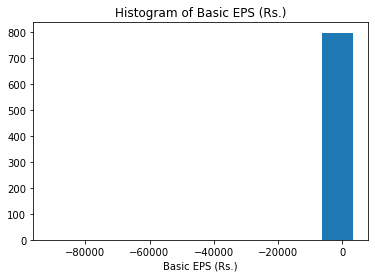

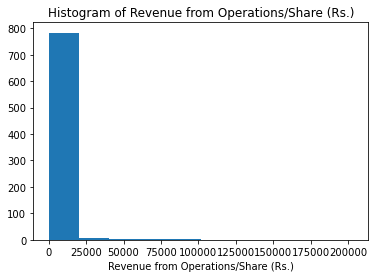

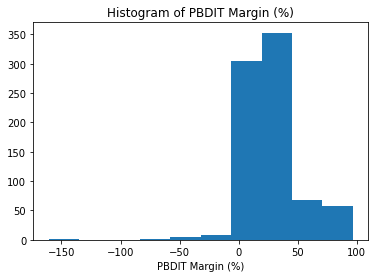

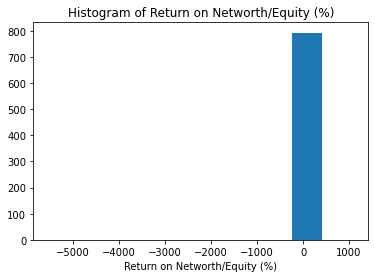

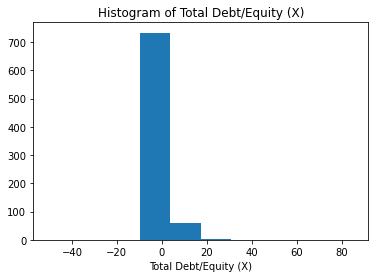

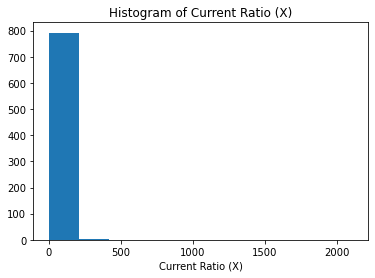

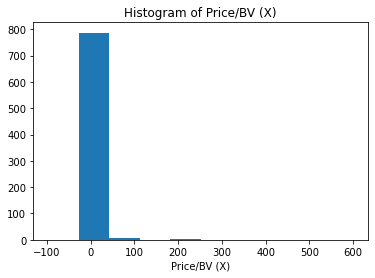

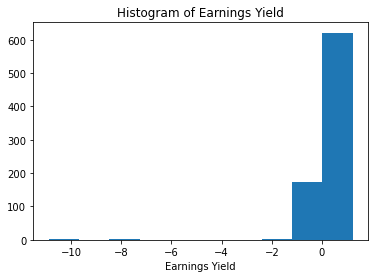

ValueError: supplied range of [-0.9999, inf] is not finite

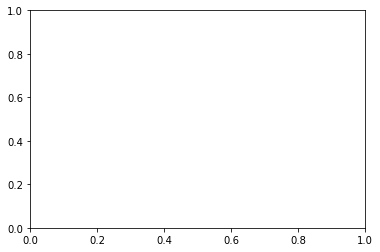

In [6]:
#Seeing the distribution of the data
for i in list(Data):
    if Data.dtypes[i] == "float64":
        plt.hist(Data[i])
        plt.xlabel(i)
        plt.title("Histogram of "+i)
        plt.show()

In [7]:
# Creating the list of columns
Column_names = ["Year",
               "Company",
               "EPS",
               "RevenuePerShare",
               "EBDITMargin",
               "ROE",
               "DE",
               "CR",
               "BV",
               "EarningYield",
               "RevenueChange",
               "Price",
               "Return",
               "Performance",
               "PE"]

In [8]:
# Naming the columns
Data.columns = Column_names

In [9]:
# Renaming the column
Data.loc[:,"EBDITMargin"]

0      19.84
1      18.65
2      17.44
3      14.80
4       6.80
       ...  
792    23.35
793    23.83
794    20.32
795    24.18
796    24.86
Name: EBDITMargin, Length: 797, dtype: float64

In [10]:
#Changing the column to percentage
Data.loc[:,("EBDITMargin","ROE")] = Data.loc[:,("EBDITMargin","ROE")]/100

In [11]:
Data.head()

,Year,Company,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,EarningYield,RevenueChange,Price,Return,Performance,PE
0,2021,ACC Ltd.,99.21,859.18,0.1984,0.1301,0.0,1.73,2.91,0.04,0.1716,1905.67,0.9836,1.0,19.208447
1,2020,ACC Ltd.,76.16,733.34,0.1865,0.1126,0.0,1.76,2.40,0.05,-0.1195,960.72,-0.4289,0.0,12.614496
2,2019,ACC Ltd.,73.35,832.89,0.1744,0.1193,0.0,1.60,2.35,0.05,0.0578,1682.10,0.1006,1.0,22.932515
3,2018,ACC Ltd.,80.97,787.36,0.1480,0.1443,0.0,1.42,2.69,0.05,0.0000,1528.38,0.0000,NaN,18.875880
4,2022,Adani Enterprises Ltd.,7.06,631.21,0.0680,0.0359,1.9,0.71,10.26,0.00,0.7558,2033.05,0.8789,1.0,287.967422


In [12]:
#Replacing the infinity values as na
Data.replace([np.inf,-np.inf],np.nan,inplace=True)

In [13]:
# finding the sum of all na values
Data.isna().sum()

Year                 0
Company              0
EPS                  0
RevenuePerShare      1
EBDITMargin          0
ROE                  0
DE                   0
CR                   0
BV                   0
EarningYield         0
RevenueChange        2
Price                0
Return              30
Performance        171
PE                   0
dtype: int64

In [14]:
# Dropping the na
Data = Data.dropna()

In [15]:
#Checking is there is any na
Data.isna().sum()

Year               0
Company            0
EPS                0
RevenuePerShare    0
EBDITMargin        0
ROE                0
DE                 0
CR                 0
BV                 0
EarningYield       0
RevenueChange      0
Price              0
Return             0
Performance        0
PE                 0
dtype: int64

In [16]:
Data.shape

(612, 15)

## Train_Validation_Test_Split

In [75]:
#Sepearting the independent variable
X = Data.drop(["Year","Company","EarningYield","Performance","Return","Price"],axis = 1)

In [76]:
X.head(2)

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE
0,99.21,859.18,0.1984,0.1301,0.0,1.73,2.91,0.1716,19.208447
1,76.16,733.34,0.1865,0.1126,0.0,1.76,2.40,-0.1195,12.614496


In [77]:
#Dependent variable
y = Data["Performance"]

In [78]:
y.head(2)

0    1.0
1    0.0
Name: Performance, dtype: float64

In [79]:
X.shape,y.shape

((612, 9), (612,))

### Train_test split

In [80]:
#Sploting into training and test and validation
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

In [81]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size = 0.15)

In [82]:
Train_data = pd.DataFrame(X_train)

In [83]:
Train_data["Performance"] = y_train

In [84]:
Train_data

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE,Performance
784,5.48,84.69,0.2040,0.0563,0.01,4.03,1.27,0.0248,22.403285,0.0
774,38.64,472.34,0.1338,0.1912,0.00,2.09,8.95,0.1102,46.138975,1.0
100,49.64,248.90,0.3163,0.1916,0.19,1.23,3.05,-0.0765,15.497180,1.0
224,55.94,2635.25,0.0470,0.1675,0.36,1.15,7.04,0.0503,42.546121,0.0
299,6.74,353.71,0.0252,0.1215,0.05,0.78,12.56,1.4305,102.274481,0.0
...,...,...,...,...,...,...,...,...,...,...
750,9.29,128.36,0.1709,0.1767,0.43,0.98,9.45,-0.0016,51.400431,1.0
578,1.00,93.26,0.5774,0.0098,4.36,1.36,0.17,0.0233,17.140000,0.0
699,39.00,254.07,0.2195,0.1331,0.59,0.61,2.75,0.1328,19.790256,0.0
422,11.15,64.99,0.7668,0.1655,6.80,144.73,2.27,0.2701,13.713901,0.0


In [85]:
Train_data.shape

(442, 10)

In [86]:
Validation_data = pd.DataFrame(X_valid)

In [87]:
Validation_data["Performance"] = y_valid

In [88]:
Validation_data.head()

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE,Performance
337,124.14,587.31,0.5191,0.1694,3.36,2.43,2.23,0.0541,12.954809,1.0
550,49.92,301.12,0.2484,0.1381,0.05,3.57,6.41,0.2344,45.246394,1.0
391,38.97,213.93,0.2761,0.2535,0.00,2.62,4.15,0.1230,15.701565,1.0
707,15.82,222.78,0.1099,0.2313,0.39,1.76,16.64,0.2270,71.432364,1.0
389,52.52,289.90,0.2777,0.2934,0.00,2.00,10.62,0.2257,36.074257,1.0


In [89]:
Validation_data.shape

(78, 10)

In [90]:
Test_data = pd.DataFrame(X_test)

In [91]:
X_test

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE
384,991.38,123.46,0.5535,0.7400,0.00,3.04,3.37,0.4166,4.608465
701,26.00,228.75,0.2173,0.1207,0.53,0.67,2.42,0.0440,19.049231
7,6.52,367.15,0.0629,0.0486,0.67,1.03,1.10,0.1240,22.914110
640,12.10,139.62,0.2784,0.0624,0.07,1.89,3.09,0.0202,50.021488
187,7.92,72.06,0.1456,0.3380,0.12,1.61,8.92,0.0088,25.950758
...,...,...,...,...,...,...,...,...,...
315,16.94,532.18,0.1311,0.0645,1.15,1.78,0.36,-0.0934,5.431523
510,0.73,45.41,0.0899,0.0136,0.00,1.68,0.54,-0.2633,38.917808
340,5.28,433.49,0.0188,0.0831,0.13,0.93,7.87,-0.2517,95.212121
616,646.31,4160.08,0.2834,0.1335,0.12,1.81,4.96,0.1138,37.738469


In [92]:
Test_data["Performance"] = y_test

In [93]:
Test_data.head()

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE,Performance
384,991.38,123.46,0.5535,0.7400,0.00,3.04,3.37,0.4166,4.608465,0.0
701,26.00,228.75,0.2173,0.1207,0.53,0.67,2.42,0.0440,19.049231,0.0
7,6.52,367.15,0.0629,0.0486,0.67,1.03,1.10,0.1240,22.914110,0.0
640,12.10,139.62,0.2784,0.0624,0.07,1.89,3.09,0.0202,50.021488,0.0
187,7.92,72.06,0.1456,0.3380,0.12,1.61,8.92,0.0088,25.950758,1.0


In [94]:
Test_data.shape

(92, 10)

## EDA

In [95]:
Train_data.shape

(442, 10)

In [96]:
Train_data.dtypes

EPS                float64
RevenuePerShare    float64
EBDITMargin        float64
ROE                float64
DE                 float64
CR                 float64
BV                 float64
RevenueChange      float64
PE                 float64
Performance        float64
dtype: object

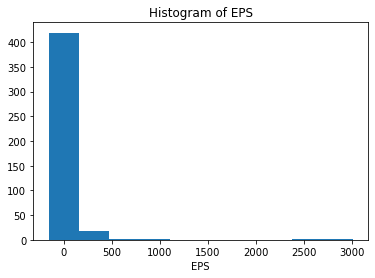

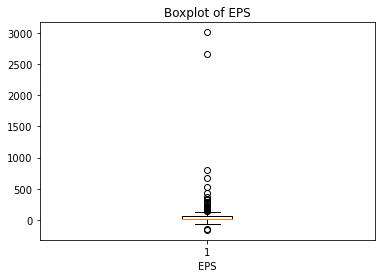

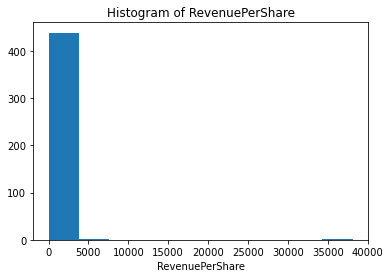

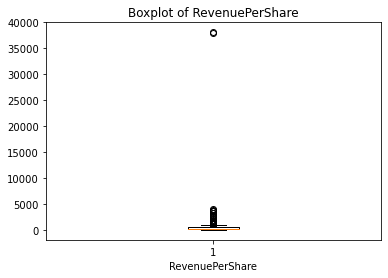

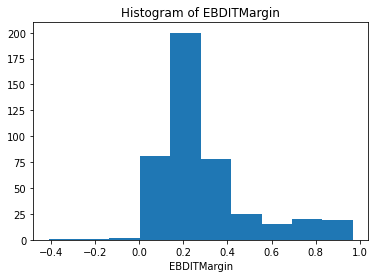

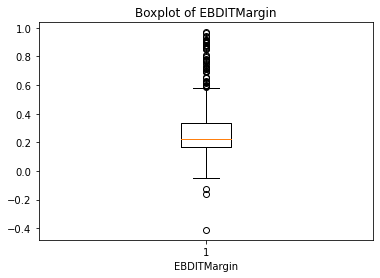

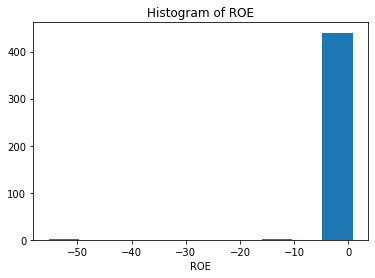

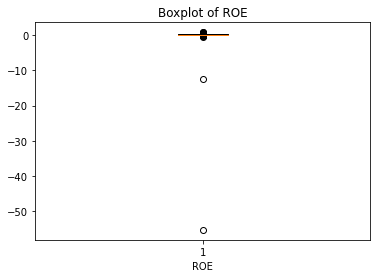

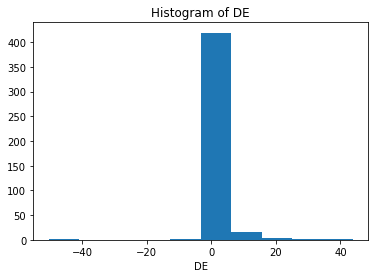

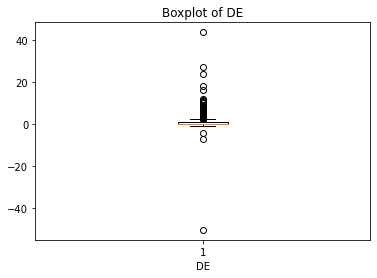

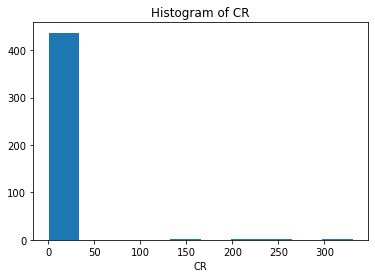

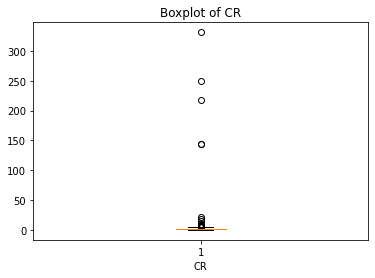

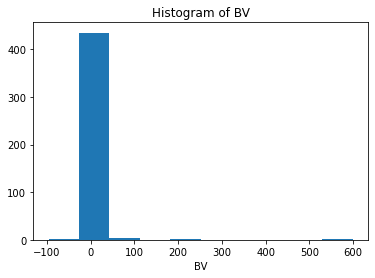

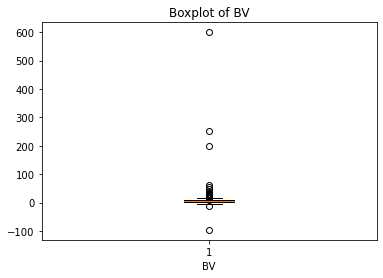

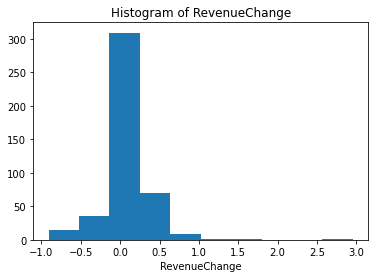

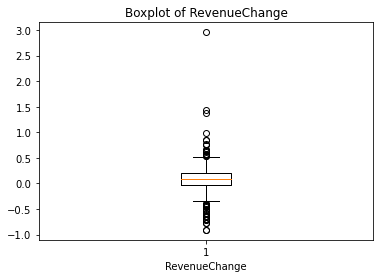

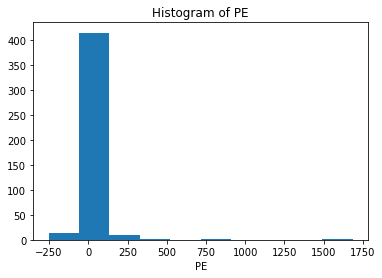

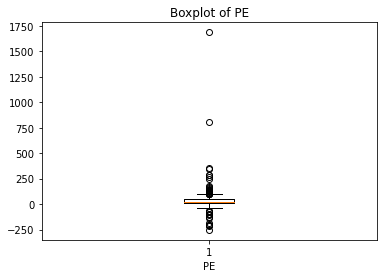

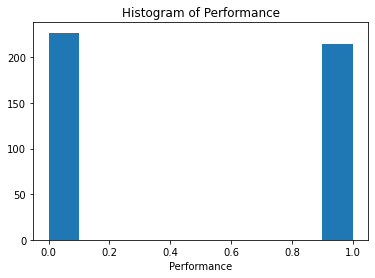

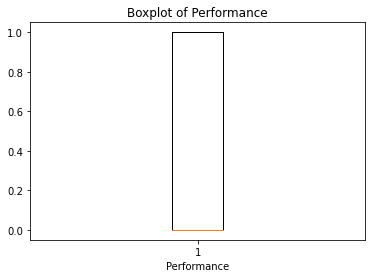

In [97]:
#plotting graphs of columns
for i in list(Train_data):
    if Train_data.dtypes[i] == "float64":
        plt.hist(Train_data[i])
        plt.xlabel(i)
        plt.title("Histogram of "+i)
        plt.show()
        plt.boxplot(Train_data[i])
        plt.xlabel(i)
        plt.title("Boxplot of "+i)
        plt.show()

It could be seen that there are so many outliers in our data , so will remove those outliers and we will scale our data.

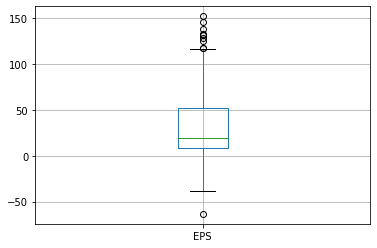

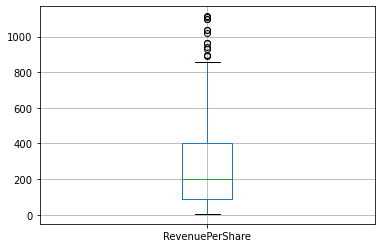

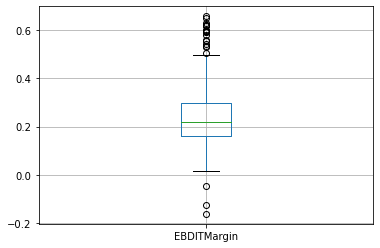

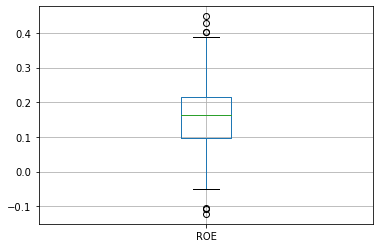

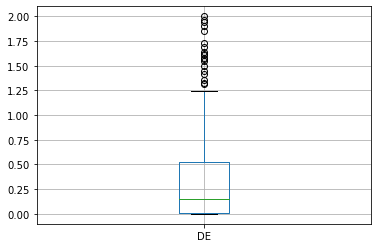

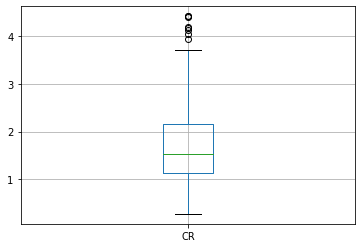

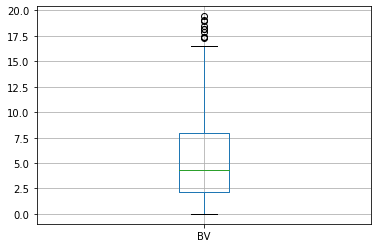

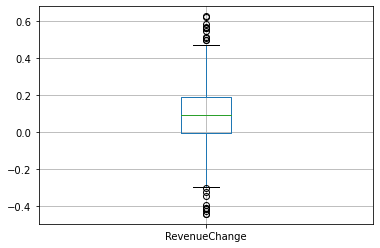

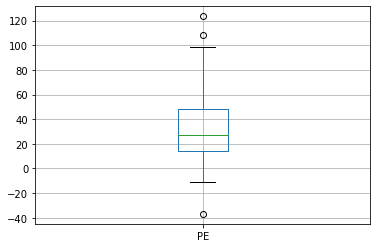

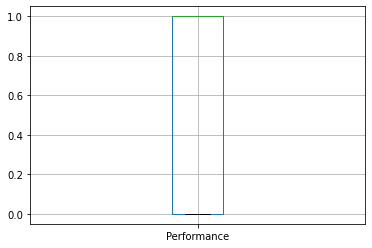

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE,Performance
EPS,1.000000,0.719997,0.099626,0.359216,-0.208007,0.305925,0.065734,0.138173,-0.136728,0.184381
RevenuePerShare,0.719997,1.000000,-0.266168,0.048728,0.087300,0.008788,-0.068306,0.190473,-0.105302,0.124469
EBDITMargin,0.099626,-0.266168,1.000000,0.162478,0.073037,0.197675,-0.075605,0.040159,-0.102461,-0.014908
ROE,0.359216,0.048728,0.162478,1.000000,-0.254270,0.222961,0.482446,0.151848,-0.050529,0.054020
DE,-0.208007,0.087300,0.073037,-0.254270,1.000000,-0.502616,-0.323557,0.050022,-0.169261,-0.067751
CR,0.305925,0.008788,0.197675,0.222961,-0.502616,1.000000,0.193332,-0.049319,0.080357,0.103419
BV,0.065734,-0.068306,-0.075605,0.482446,-0.323557,0.193332,1.000000,0.058875,0.671011,0.086752
RevenueChange,0.138173,0.190473,0.040159,0.151848,0.050022,-0.049319,0.058875,1.000000,0.042298,0.206247
PE,-0.136728,-0.105302,-0.102461,-0.050529,-0.169261,0.080357,0.671011,0.042298,1.000000,0.137549
Performance,0.184381,0.124469,-0.014908,0.054020,-0.067751,0.103419,0.086752,0.206247,0.137549,1.000000


In [98]:
#Removing outliers
Column_Name = list(Train_data)
for i in Column_Name:
    Quantile_25 =np.quantile(Train_data[i],0.25)
    Quantile_75 =np.quantile(Train_data[i],0.75)
    IQR = Quantile_75-Quantile_25
    Lower = Quantile_25-(2*IQR)
    Upper = Quantile_75+(2*IQR)
    Train_data = Train_data[Train_data[i] > Lower]
    Train_data = Train_data[Train_data[i]<Upper]
    Train_data[[i]].boxplot()
    plt.show()
y_traindummy = list(Train_data["Performance"])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(Train_data))
Train_Data_Scaled = pd.DataFrame(scaler.fit_transform(Train_data[Column_Name[0:len(Column_Name)-1]]))
Train_Data_Scaled.columns = Column_Name[0:len(Column_Name)-1]
Train_Data_Scaled["Performance"] = y_traindummy
corr = Train_Data_Scaled.corr()
corr.style.background_gradient()

In [99]:
Train_Data_Scaled.shape

(265, 10)

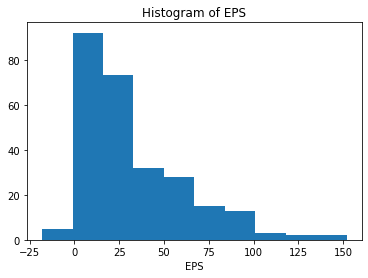

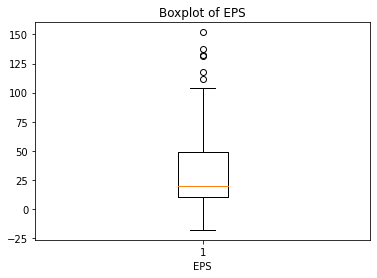

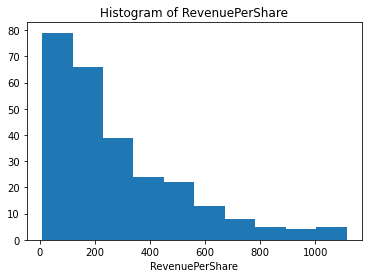

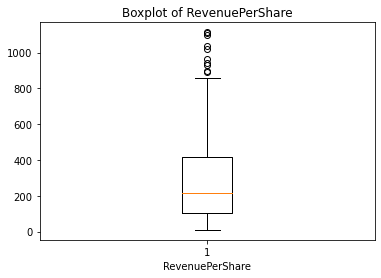

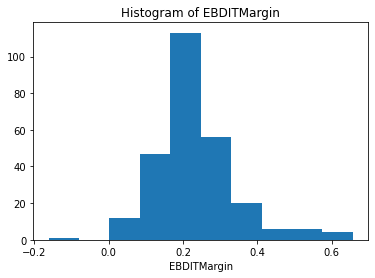

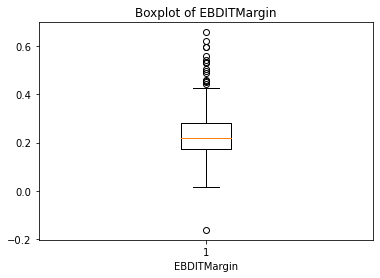

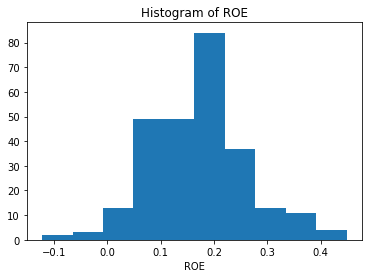

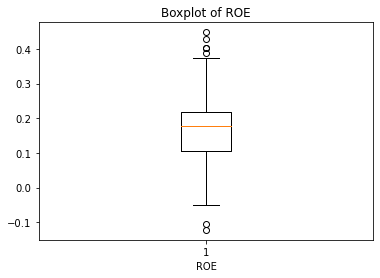

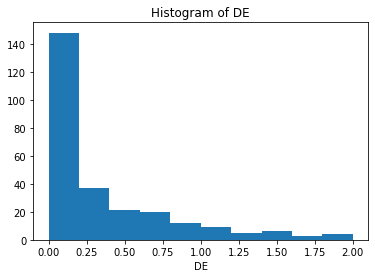

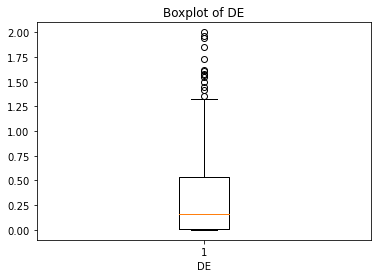

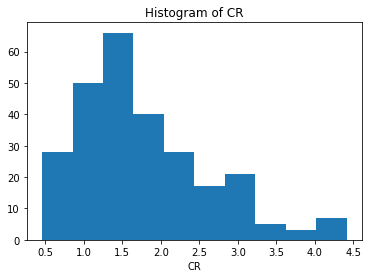

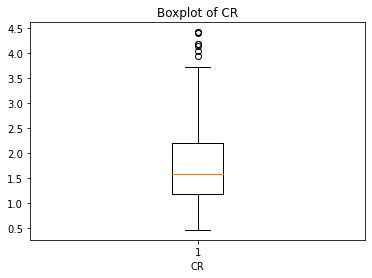

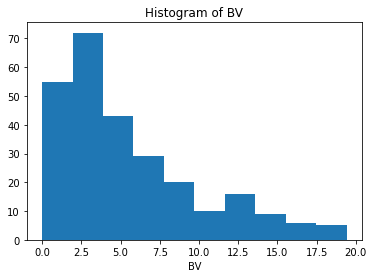

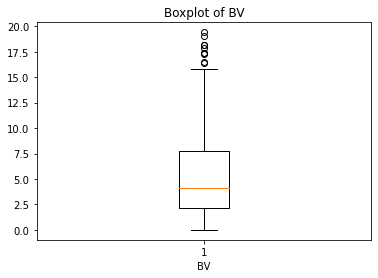

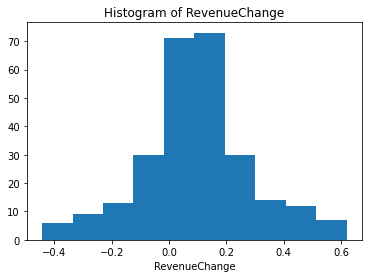

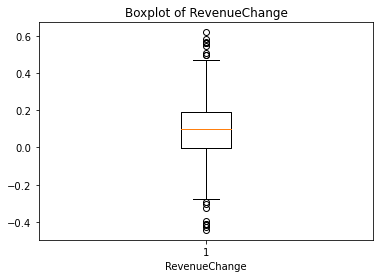

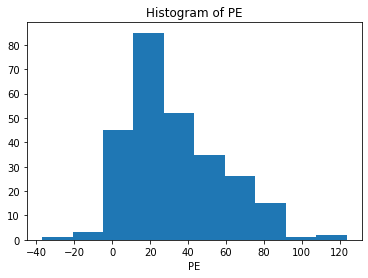

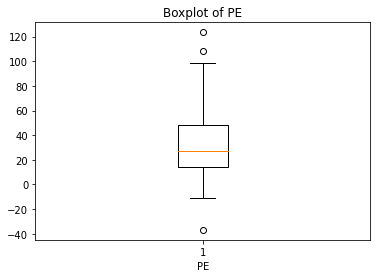

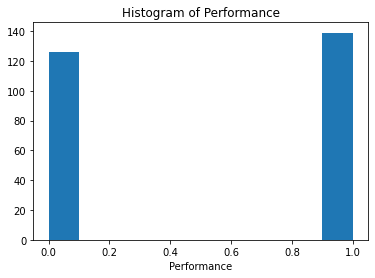

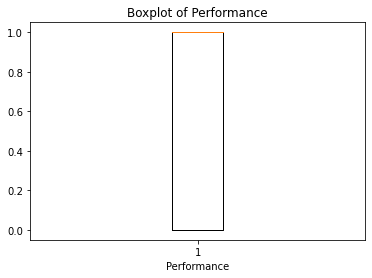

In [100]:
for i in list(Train_Data_Scaled):
    if Train_data.dtypes[i] == "float64":
        plt.hist(Train_data[i])
        plt.xlabel(i)
        plt.title("Histogram of "+i)
        plt.show()
        plt.boxplot(Train_data[i])
        plt.xlabel(i)
        plt.title("Boxplot of "+i)
        plt.show()

In [101]:
Train_Data_Scaled.describe()

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE,Performance
count,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,265.000000
mean,2.513713e-16,-3.770569e-17,1.065186e-16,-1.240098e-16,1.093465e-16,2.010970e-16,-2.329374e-16,3.168325e-17,-1.910422e-16,0.524528
std,1.001892e+00,1.001892e+00,1.001892e+00,1.001892e+00,1.001892e+00,1.001892e+00,1.001892e+00,1.001892e+00,1.001892e+00,0.500343
min,-1.687930e+00,-1.148354e+00,-3.635767e+00,-3.219444e+00,-7.717084e-01,-1.570130e+00,-1.230429e+00,-2.790919e+00,-2.905681e+00,0.000000
25%,-7.414564e-01,-7.656403e-01,-5.495267e-01,-7.200238e-01,-7.491364e-01,-7.204652e-01,-7.519918e-01,-5.021854e-01,-7.675951e-01,0.000000
50%,-4.299885e-01,-2.790233e-01,-1.231383e-01,6.111375e-02,-4.105557e-01,-2.417808e-01,-3.156396e-01,1.698910e-02,-2.405702e-01,1.000000
75%,5.553765e-01,5.414333e-01,4.370734e-01,5.225452e-01,4.471820e-01,5.001801e-01,4.751102e-01,4.909502e-01,6.551234e-01,1.000000
max,4.009016e+00,3.448283e+00,3.915554e+00,3.042840e+00,3.742701e+00,3.156879e+00,3.068858e+00,2.729273e+00,3.792342e+00,1.000000


In [102]:
Train_Data_Scaled.groupby("Performance").mean()

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE
Performance,,,,,,,,,
0.0,-0.193659,-0.130732,0.015658,-0.056738,0.071160,-0.108623,-0.091117,-0.216626,-0.144471
1.0,0.175547,0.118505,-0.014194,0.051431,-0.064505,0.098464,0.082596,0.196366,0.130959


In [103]:
Train_Data_Scaled.groupby("Performance").std()

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE
Performance,,,,,,,,,
0.0,0.841161,0.897483,1.087815,1.053632,1.027859,0.975778,1.047075,1.014689,1.015585
1.0,1.101866,1.077471,0.920866,0.953480,0.976988,1.018481,0.955381,0.951841,0.974529


In [104]:
Train_Data_Scaled.corr()

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE,Performance
EPS,1.000000,0.719997,0.099626,0.359216,-0.208007,0.305925,0.065734,0.138173,-0.136728,0.184381
RevenuePerShare,0.719997,1.000000,-0.266168,0.048728,0.087300,0.008788,-0.068306,0.190473,-0.105302,0.124469
EBDITMargin,0.099626,-0.266168,1.000000,0.162478,0.073037,0.197675,-0.075605,0.040159,-0.102461,-0.014908
ROE,0.359216,0.048728,0.162478,1.000000,-0.254270,0.222961,0.482446,0.151848,-0.050529,0.054020
DE,-0.208007,0.087300,0.073037,-0.254270,1.000000,-0.502616,-0.323557,0.050022,-0.169261,-0.067751
CR,0.305925,0.008788,0.197675,0.222961,-0.502616,1.000000,0.193332,-0.049319,0.080357,0.103419
BV,0.065734,-0.068306,-0.075605,0.482446,-0.323557,0.193332,1.000000,0.058875,0.671011,0.086752
RevenueChange,0.138173,0.190473,0.040159,0.151848,0.050022,-0.049319,0.058875,1.000000,0.042298,0.206247
PE,-0.136728,-0.105302,-0.102461,-0.050529,-0.169261,0.080357,0.671011,0.042298,1.000000,0.137549
Performance,0.184381,0.124469,-0.014908,0.054020,-0.067751,0.103419,0.086752,0.206247,0.137549,1.000000


In [105]:
# Some of the variables are more correlated
corr = Train_Data_Scaled.corr()
corr.style.background_gradient()

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE,Performance
EPS,1.000000,0.719997,0.099626,0.359216,-0.208007,0.305925,0.065734,0.138173,-0.136728,0.184381
RevenuePerShare,0.719997,1.000000,-0.266168,0.048728,0.087300,0.008788,-0.068306,0.190473,-0.105302,0.124469
EBDITMargin,0.099626,-0.266168,1.000000,0.162478,0.073037,0.197675,-0.075605,0.040159,-0.102461,-0.014908
ROE,0.359216,0.048728,0.162478,1.000000,-0.254270,0.222961,0.482446,0.151848,-0.050529,0.054020
DE,-0.208007,0.087300,0.073037,-0.254270,1.000000,-0.502616,-0.323557,0.050022,-0.169261,-0.067751
CR,0.305925,0.008788,0.197675,0.222961,-0.502616,1.000000,0.193332,-0.049319,0.080357,0.103419
BV,0.065734,-0.068306,-0.075605,0.482446,-0.323557,0.193332,1.000000,0.058875,0.671011,0.086752
RevenueChange,0.138173,0.190473,0.040159,0.151848,0.050022,-0.049319,0.058875,1.000000,0.042298,0.206247
PE,-0.136728,-0.105302,-0.102461,-0.050529,-0.169261,0.080357,0.671011,0.042298,1.000000,0.137549
Performance,0.184381,0.124469,-0.014908,0.054020,-0.067751,0.103419,0.086752,0.206247,0.137549,1.000000


In [106]:
X_train = Train_Data_Scaled.drop(["Performance"],axis = 1)

In [107]:
X_train

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE
0,-0.900711,-0.833065,-0.264345,-1.261656,-0.749136,2.702128,-0.949125,-0.360309,-0.429433
1,0.211052,0.779355,-0.912234,0.220417,-0.771708,0.380509,0.751983,0.083510,0.561260
2,0.579851,-0.150038,0.772093,0.224812,-0.342840,-0.648663,-0.554858,-0.886759,-0.717684
3,-0.765931,-0.878612,-0.421241,2.138654,-0.545988,-0.169978,3.068858,0.456131,0.888929
4,-0.500731,-0.562949,-0.607671,2.089215,0.469754,-1.175215,-0.160591,1.217483,-0.815008
...,...,...,...,...,...,...,...,...,...
260,0.971785,0.381377,0.194346,-0.420093,-0.771708,0.129200,-0.047626,0.448855,0.313726
261,0.368965,-0.393658,0.819162,0.344564,0.469754,-1.127347,-1.144044,2.097325,-1.288200
262,-0.772972,-0.651421,-0.569831,0.061114,0.198890,-0.947840,0.862733,-0.497508,0.780866
263,0.223122,-0.128533,-0.121292,-0.417896,0.560042,-1.390623,-0.621308,0.200961,-0.538497


In [108]:
y_train = Train_Data_Scaled["Performance"]

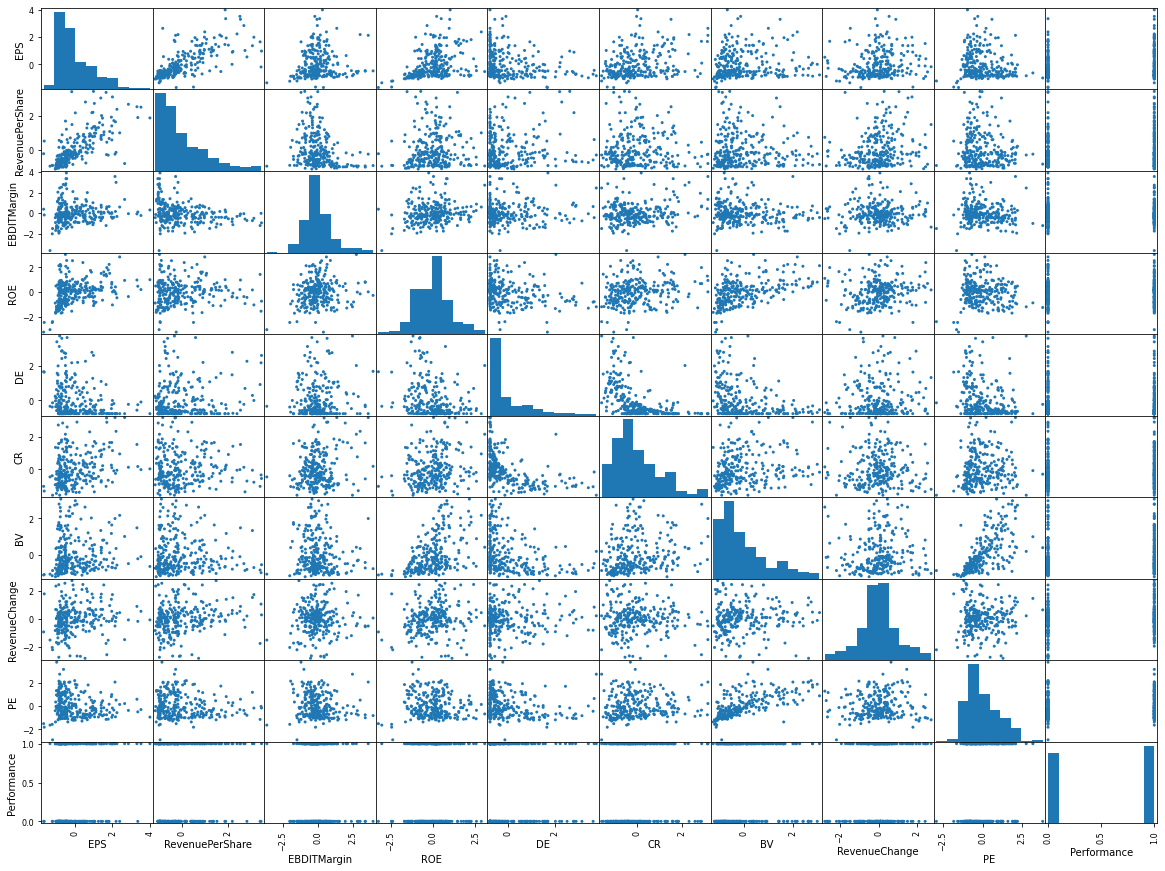

In [109]:
from pandas.plotting import scatter_matrix
scatter_matrix(Train_Data_Scaled,
              alpha = 1,
              figsize = (20,15),
              diagonal = "hist")
plt.show()

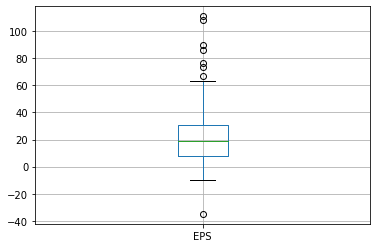

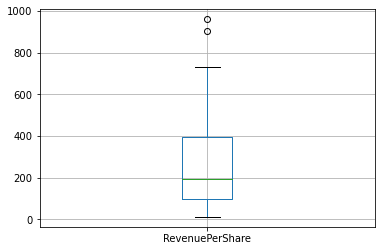

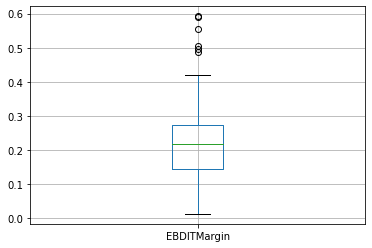

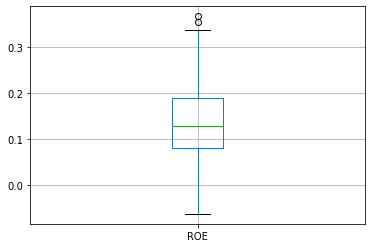

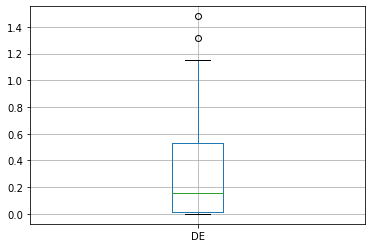

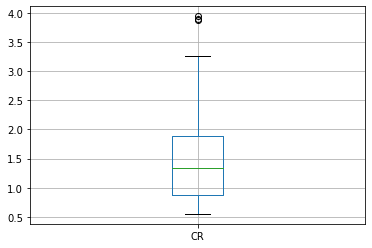

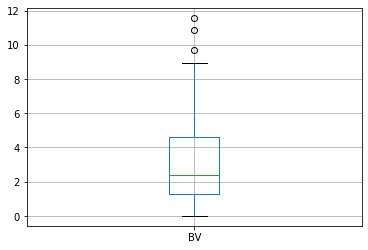

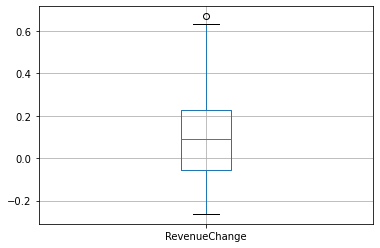

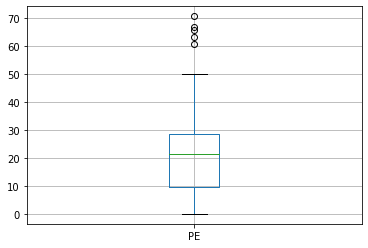

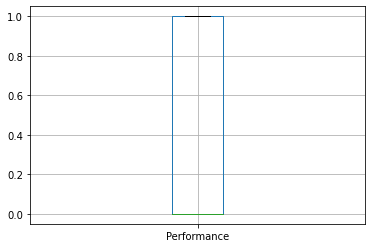

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE,Performance
EPS,1.000000,0.771524,0.049679,0.263088,-0.170173,0.174167,0.130739,0.061314,-0.210796,0.421405
RevenuePerShare,0.771524,1.000000,-0.351068,-0.087274,0.160530,-0.059516,-0.059584,0.082697,-0.170421,0.437520
EBDITMargin,0.049679,-0.351068,1.000000,0.377920,-0.225734,0.469290,-0.055226,-0.079024,-0.125571,-0.198600
ROE,0.263088,-0.087274,0.377920,1.000000,-0.243328,0.174842,0.268071,0.228287,-0.363161,0.097221
DE,-0.170173,0.160530,-0.225734,-0.243328,1.000000,-0.536080,-0.356796,-0.152657,-0.248200,-0.037699
CR,0.174167,-0.059516,0.469290,0.174842,-0.536080,1.000000,0.199960,-0.090617,0.117367,-0.021631
BV,0.130739,-0.059584,-0.055226,0.268071,-0.356796,0.199960,1.000000,0.245763,0.647531,0.190596
RevenueChange,0.061314,0.082697,-0.079024,0.228287,-0.152657,-0.090617,0.245763,1.000000,0.034697,0.100362
PE,-0.210796,-0.170421,-0.125571,-0.363161,-0.248200,0.117367,0.647531,0.034697,1.000000,0.051500
Performance,0.421405,0.437520,-0.198600,0.097221,-0.037699,-0.021631,0.190596,0.100362,0.051500,1.000000


In [110]:
Column_Name = list(Test_data)
for i in Column_Name:
    Quantile_25 =np.quantile(Test_data[i],0.25)
    Quantile_75 =np.quantile(Test_data[i],0.75)
    IQR = Quantile_75-Quantile_25
    Lower = Quantile_25-(2*IQR)
    Upper = Quantile_75+(2*IQR)
    Test_data = Test_data[Test_data[i] > Lower]
    Test_data = Test_data[Test_data[i]<Upper]
    Test_data[[i]].boxplot()
    plt.show()
y_testdummy = list(Test_data["Performance"])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(Test_data))
Test_Data_Scaled = pd.DataFrame(scaler.fit_transform(Test_data[Column_Name[0:len(Column_Name)-1]]))
Test_Data_Scaled.columns = Column_Name[0:len(Column_Name)-1]

Test_Data_Scaled["Performance"] = y_testdummy
corr = Test_Data_Scaled.corr()
corr.style.background_gradient()

In [111]:
X_test = Test_Data_Scaled.drop(["Performance"],axis = 1)
y_test = Test_Data_Scaled["Performance"]

# Validation data structure

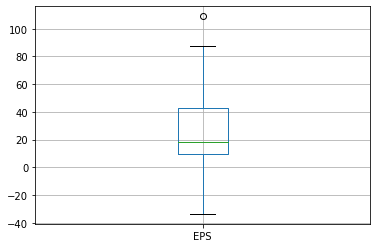

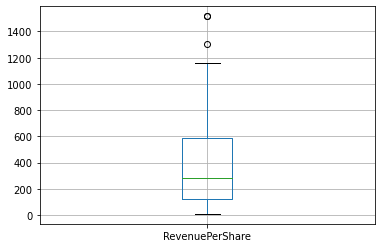

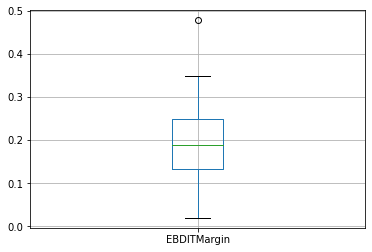

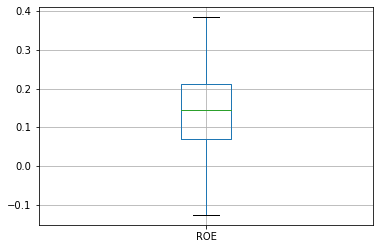

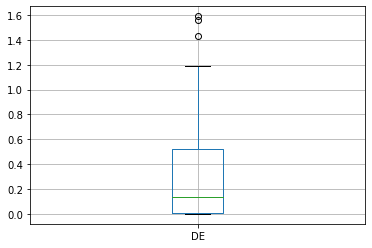

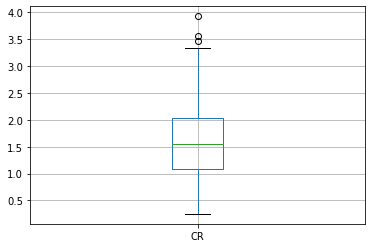

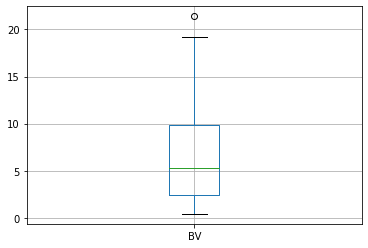

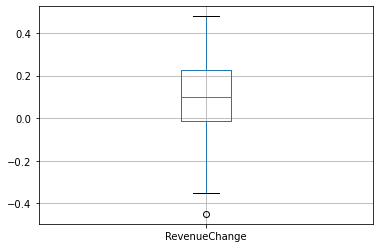

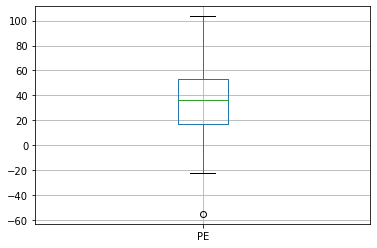

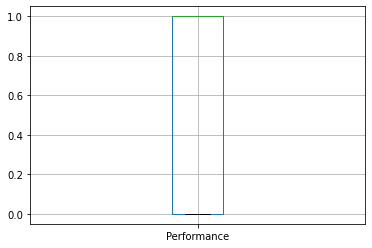

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE,Performance
EPS,1.000000,0.578116,0.148811,0.439290,-0.057908,0.398435,-0.032666,0.416156,-0.031004,0.480670
RevenuePerShare,0.578116,1.000000,-0.311741,-0.170568,0.577650,-0.141363,-0.340747,0.336490,-0.150694,0.049866
EBDITMargin,0.148811,-0.311741,1.000000,0.332716,-0.101815,0.275982,0.003885,-0.168899,-0.135137,0.245116
ROE,0.439290,-0.170568,0.332716,1.000000,-0.436692,0.382264,0.520109,0.230182,0.236765,0.399814
DE,-0.057908,0.577650,-0.101815,-0.436692,1.000000,-0.499121,-0.447170,0.086262,-0.147162,-0.096233
CR,0.398435,-0.141363,0.275982,0.382264,-0.499121,1.000000,0.287103,0.109930,0.059112,0.530546
BV,-0.032666,-0.340747,0.003885,0.520109,-0.447170,0.287103,1.000000,0.176594,0.745409,0.254540
RevenueChange,0.416156,0.336490,-0.168899,0.230182,0.086262,0.109930,0.176594,1.000000,0.217043,0.399665
PE,-0.031004,-0.150694,-0.135137,0.236765,-0.147162,0.059112,0.745409,0.217043,1.000000,0.145471
Performance,0.480670,0.049866,0.245116,0.399814,-0.096233,0.530546,0.254540,0.399665,0.145471,1.000000


In [112]:
Column_Name = list(Validation_data)
for i in Column_Name:
    Quantile_25 =np.quantile(Validation_data[i],0.25)
    Quantile_75 =np.quantile(Validation_data[i],0.75)
    IQR = Quantile_75-Quantile_25
    Lower = Quantile_25-(2*IQR)
    Upper = Quantile_75+(2*IQR)
    Validation_data = Validation_data[Validation_data[i] > Lower]
    Validation_data = Validation_data[Validation_data[i]<Upper]
    Validation_data[[i]].boxplot()
    plt.show()
y_validdummy = list(Validation_data["Performance"])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(Validation_data))
Validation_Data_Scaled = pd.DataFrame(scaler.fit_transform(Validation_data[Column_Name[0:len(Column_Name)-1]]))
Validation_Data_Scaled.columns = Column_Name[0:len(Column_Name)-1]

Validation_Data_Scaled["Performance"] = y_validdummy
corr = Validation_Data_Scaled.corr()
corr.style.background_gradient()

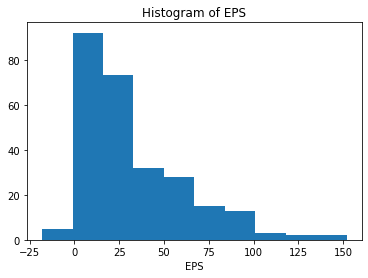

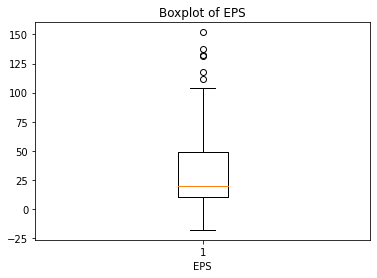

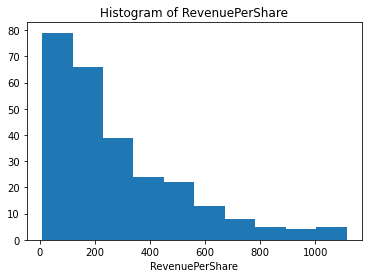

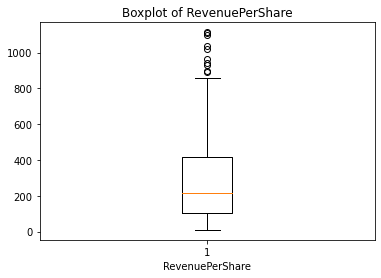

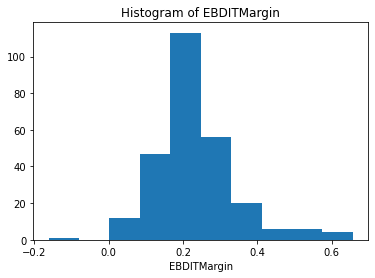

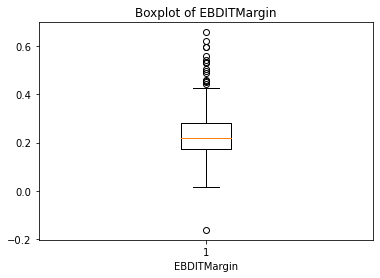

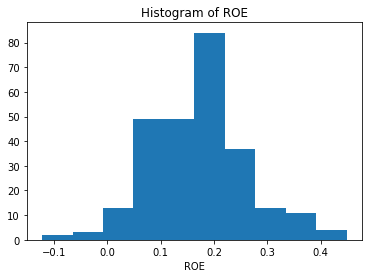

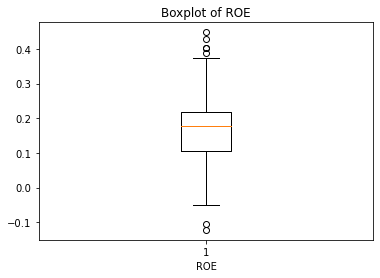

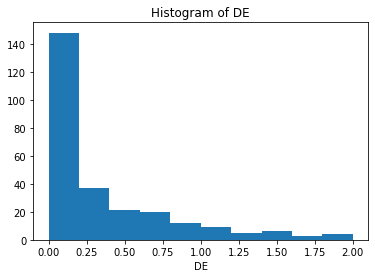

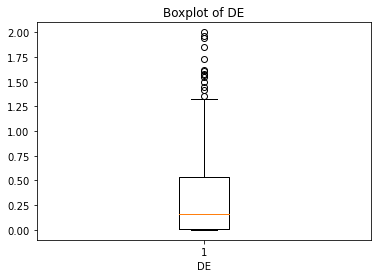

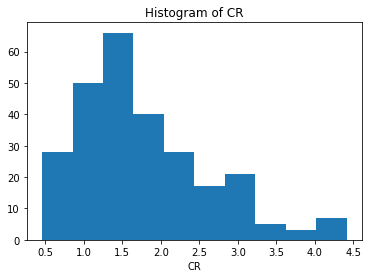

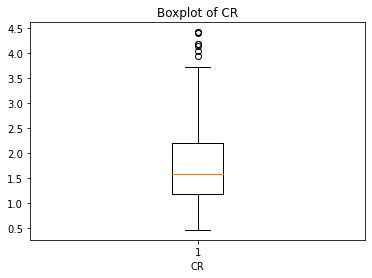

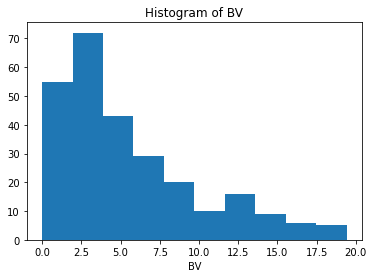

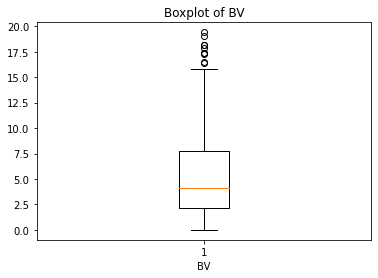

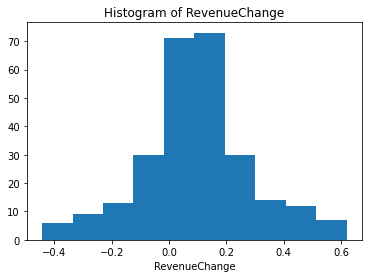

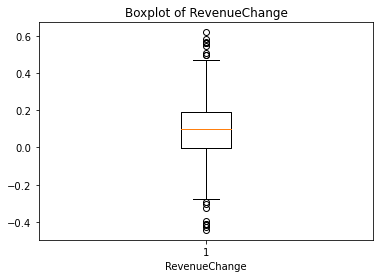

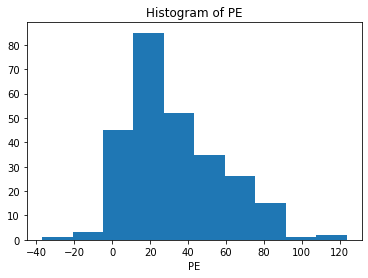

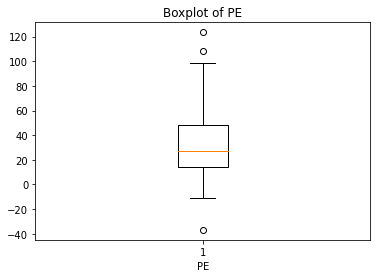

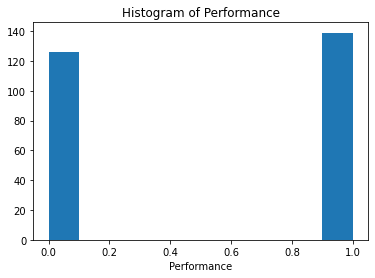

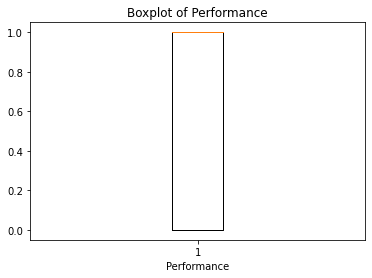

In [113]:
for i in list(Validation_Data_Scaled):
    if Train_data.dtypes[i] == "float64":
        plt.hist(Train_data[i])
        plt.xlabel(i)
        plt.title("Histogram of "+i)
        plt.show()
        plt.boxplot(Train_data[i])
        plt.xlabel(i)
        plt.title("Boxplot of "+i)
        plt.show()

In [114]:
X_valid = Validation_Data_Scaled.drop(["Performance"],axis = 1)
y_valid = Validation_Data_Scaled["Performance"]

## Model 1 Decision Tree

In [115]:
#Fitting the decision tree
from sklearn.tree import DecisionTreeClassifier
clas_tree = DecisionTreeClassifier(random_state=0)
clas_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

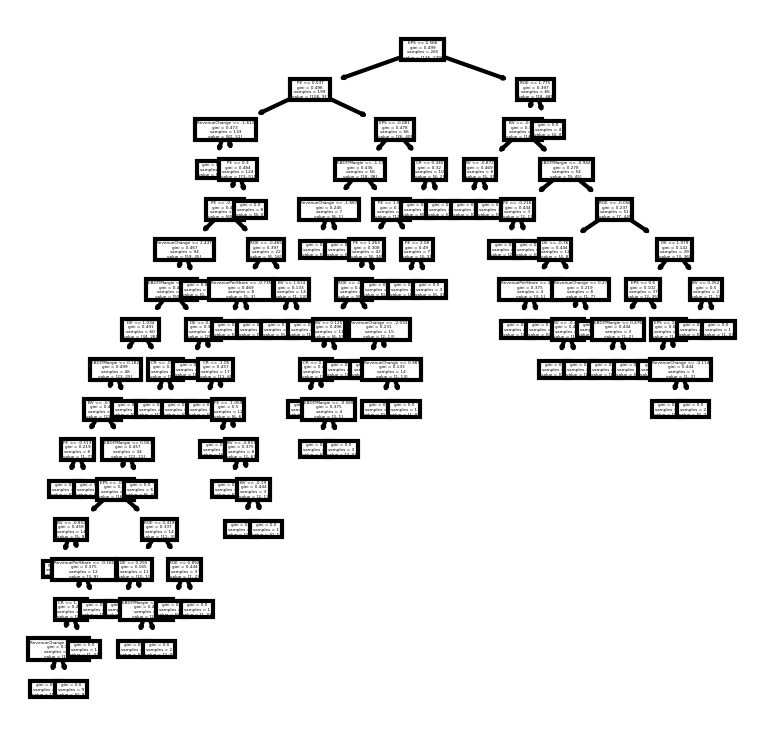

In [116]:
#Making the graph
from sklearn import tree
fig, axes = plt.subplots(figsize = (3,3),
                         dpi = 300)
tree.plot_tree(clas_tree,
              feature_names = list(X),
              filled = False)
plt.show()

In [117]:
#Testing with validation set
y_pred = clas_tree.predict(X_valid)
y_pred

array([1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.])

In [118]:
X_valid.shape

(49, 9)

## Basic Model 

In [119]:
#Calculating the parameters
from sklearn import metrics
cm = metrics.confusion_matrix(y_valid, y_pred)
print(cm)
print(metrics.accuracy_score(y_valid, y_pred))
print(metrics.precision_score(y_valid, y_pred))
print(metrics.recall_score(y_valid, y_pred))
print(metrics.f1_score(y_valid, y_pred))

[[10 13]
 [ 8 18]]
0.5714285714285714
0.5806451612903226
0.6923076923076923
0.631578947368421


In [120]:
print(metrics.classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.43      0.49        23
         1.0       0.58      0.69      0.63        26

    accuracy                           0.57        49
   macro avg       0.57      0.56      0.56        49
weighted avg       0.57      0.57      0.56        49



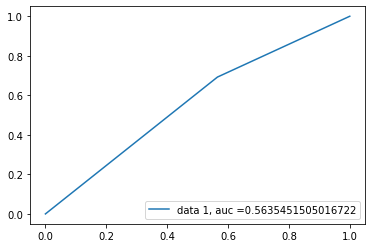

In [121]:
#plotting ROC curve
y_pred_proba = clas_tree.predict_proba(X_valid)[::,1]

y_pred_proba

fpr, tpr,_ = metrics.roc_curve(y_valid,y_pred_proba)

auc = metrics.roc_auc_score(y_valid,y_pred_proba)

plt.plot(fpr,tpr,label = "data 1, auc ="+str(auc))
plt.legend(loc = 4)
plt.show()

AUC of 0.56 of our base model 

## Hyperparameter Tuning

Varying model with different depth with validation data

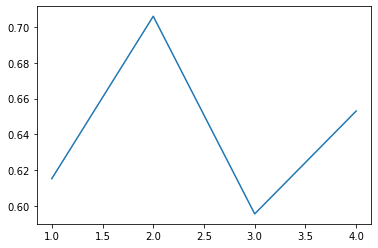

In [122]:
#Fitting model for varies value of depth
depth = np.arange(1,5)
F1 = []
Accuracy = []
for i in depth :
    clas_tree = DecisionTreeClassifier(max_depth=i,random_state=0)
    clas_tree.fit(X_train,y_train)
    y_pred = clas_tree.predict(X_valid)
    F1.append(metrics.f1_score(y_valid,y_pred))
    Accuracy.append(metrics.accuracy_score(y_valid,y_pred))
plt.plot(depth,np.array(F1))
plt.show()


Thus, the model meets highest at depth 2, thus we will re fit the model at depth2

## Model 2

In [123]:
#Fitting at depth 2
from sklearn.tree import DecisionTreeClassifier
clas_tree2 = DecisionTreeClassifier(random_state=0,max_depth=2)
clas_tree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

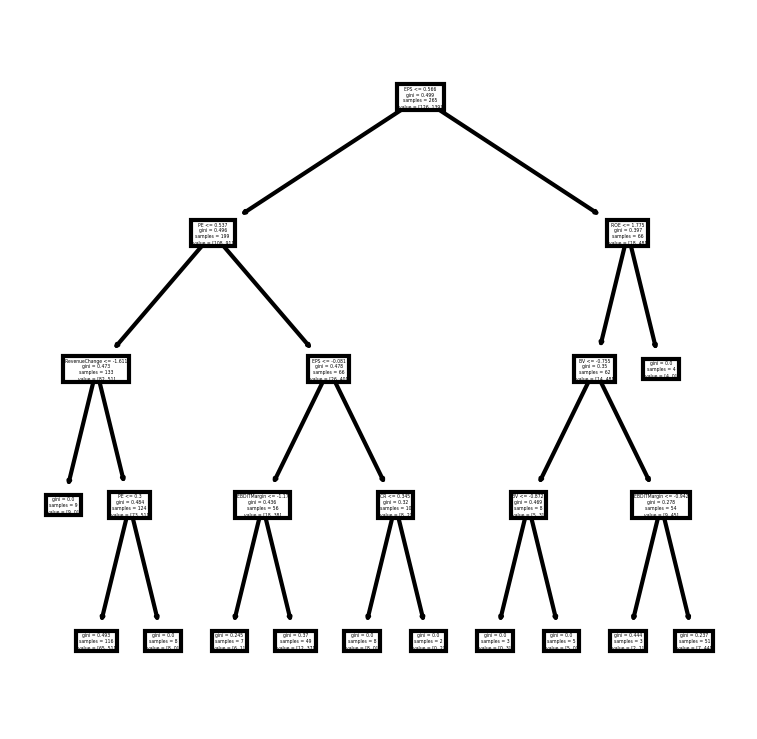

In [134]:
#Making the graph
from sklearn import tree
fig, axes = plt.subplots(figsize = (3,3),
                         dpi = 300)
tree.plot_tree(clas_tree,
              feature_names = list(X),
              filled = False)
plt.show()

In [124]:
#Testing with valid set
y_pred2 = clas_tree2.predict(X_valid)
y_pred2

array([1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.])

In [125]:
#Finding the metrices
from sklearn import metrics
cm = metrics.confusion_matrix(y_valid, y_pred2)
print(cm)
print(metrics.accuracy_score(y_valid, y_pred2))
print(metrics.precision_score(y_valid, y_pred2))
print(metrics.recall_score(y_valid, y_pred2))
print(metrics.f1_score(y_valid, y_pred2))

[[16  7]
 [ 8 18]]
0.6938775510204082
0.72
0.6923076923076923
0.7058823529411765


In [126]:
print(metrics.classification_report(y_valid,y_pred2))

              precision    recall  f1-score   support

         0.0       0.67      0.70      0.68        23
         1.0       0.72      0.69      0.71        26

    accuracy                           0.69        49
   macro avg       0.69      0.69      0.69        49
weighted avg       0.69      0.69      0.69        49



In [127]:
import matplotlib.pyplot as plt

In [128]:
#For plotting roc curve
y_pred_proba2 = clas_tree2.predict_proba(X_valid)[::,1]

In [129]:
y_pred_proba2

array([0.77419355, 0.38345865, 0.60606061, 0.77419355, 0.38345865,
       0.77419355, 0.38345865, 0.60606061, 0.60606061, 0.38345865,
       0.38345865, 0.77419355, 0.77419355, 0.38345865, 0.38345865,
       0.60606061, 0.60606061, 0.60606061, 0.38345865, 0.60606061,
       0.38345865, 0.77419355, 0.38345865, 0.77419355, 0.77419355,
       0.38345865, 0.38345865, 0.60606061, 0.38345865, 0.60606061,
       0.77419355, 0.38345865, 0.38345865, 0.38345865, 0.38345865,
       0.38345865, 0.77419355, 0.60606061, 0.60606061, 0.38345865,
       0.38345865, 0.77419355, 0.        , 0.38345865, 0.38345865,
       0.60606061, 0.38345865, 0.60606061, 0.77419355])

In [130]:
fpr, tpr,_ = metrics.roc_curve(y_valid,y_pred_proba2)

In [131]:
auc = metrics.roc_auc_score(y_valid,y_pred_proba2)

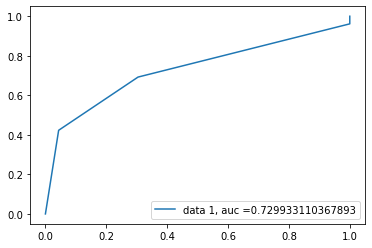

In [132]:
plt.plot(fpr,tpr,label = "data 1, auc ="+str(auc))
plt.legend(loc = 4)
plt.show()

In [133]:
metrics.roc_curve(y_valid,y_pred)

(array([0.        , 0.30434783, 1.        ]),
 array([0.        , 0.61538462, 1.        ]),
 array([2., 1., 0.]))

## Final Testing

In [135]:
#Finally testing with the test data
ytest_pred = clas_tree2.predict(X_test)
ytest_pred

array([0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.])

In [136]:
print(metrics.classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72        29
         1.0       0.59      0.50      0.54        20

    accuracy                           0.65        49
   macro avg       0.64      0.63      0.63        49
weighted avg       0.65      0.65      0.65        49



## Knn

In [161]:
#Splitting data into train and split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
Train_data = pd.DataFrame(X_train)
Train_data["Performance"] = y_train
print(Train_data.shape)
Test_data = pd.DataFrame(X_test)
Test_data["Performance"] = y_test
print(Test_data.shape)

(489, 10)
(123, 10)


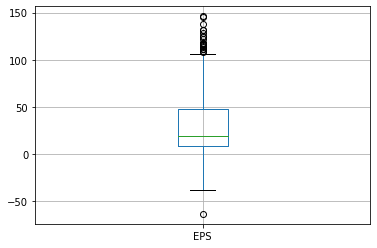

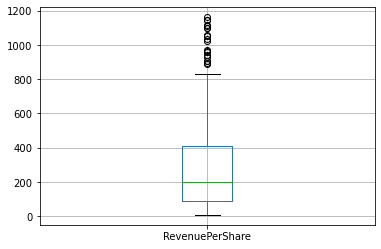

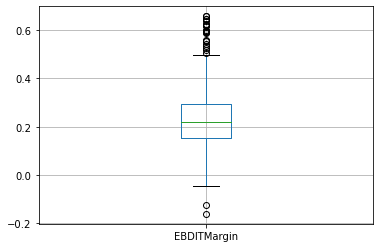

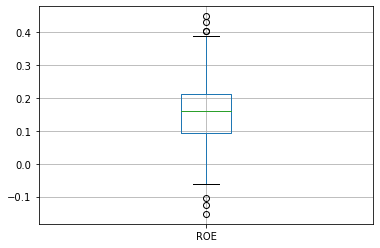

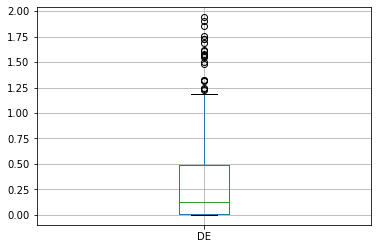

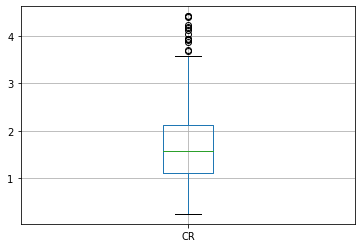

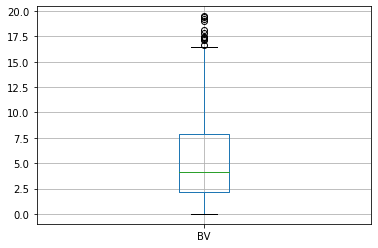

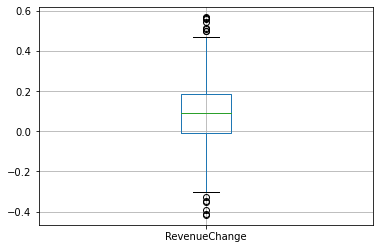

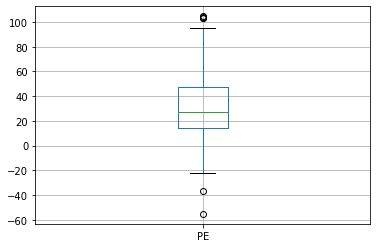

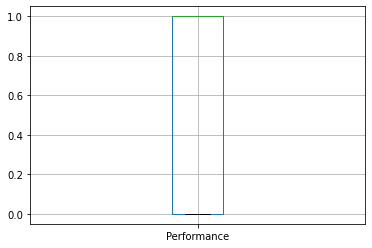

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE,Performance
EPS,1.000000,0.703872,0.102819,0.346257,-0.125516,0.309341,0.091962,0.143792,-0.085303,0.237633
RevenuePerShare,0.703872,1.000000,-0.294101,-0.022426,0.169227,-0.012975,-0.066438,0.144357,-0.058881,0.147208
EBDITMargin,0.102819,-0.294101,1.000000,0.259565,0.024377,0.286102,-0.053161,0.052656,-0.144949,-0.060639
ROE,0.346257,-0.022426,0.259565,1.000000,-0.214393,0.215862,0.479560,0.187648,0.005104,0.122701
DE,-0.125516,0.169227,0.024377,-0.214393,1.000000,-0.466170,-0.346717,0.016652,-0.283175,-0.098643
CR,0.309341,-0.012975,0.286102,0.215862,-0.466170,1.000000,0.151550,-0.029116,0.068824,0.159426
BV,0.091962,-0.066438,-0.053161,0.479560,-0.346717,0.151550,1.000000,0.136313,0.714717,0.187845
RevenueChange,0.143792,0.144357,0.052656,0.187648,0.016652,-0.029116,0.136313,1.000000,0.090572,0.208442
PE,-0.085303,-0.058881,-0.144949,0.005104,-0.283175,0.068824,0.714717,0.090572,1.000000,0.168769
Performance,0.237633,0.147208,-0.060639,0.122701,-0.098643,0.159426,0.187845,0.208442,0.168769,1.000000


In [162]:
# Cleaning Train data
Column_Name = list(Train_data)
for i in Column_Name:
    Quantile_25 =np.quantile(Train_data[i],0.25)
    Quantile_75 =np.quantile(Train_data[i],0.75)
    IQR = Quantile_75-Quantile_25
    Lower = Quantile_25-(2*IQR)
    Upper = Quantile_75+(2*IQR)
    Train_data = Train_data[Train_data[i] > Lower]
    Train_data = Train_data[Train_data[i]<Upper]
    Train_data[[i]].boxplot()
    plt.show()
y_traindummy = list(Train_data["Performance"])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(Train_data))
Train_Data_Scaled = pd.DataFrame(scaler.fit_transform(Train_data[Column_Name[0:len(Column_Name)-1]]))
Train_Data_Scaled.columns = Column_Name[0:len(Column_Name)-1]
Train_Data_Scaled["Performance"] = y_traindummy
corr = Train_Data_Scaled.corr()
corr.style.background_gradient()

In [163]:
X_train = Train_Data_Scaled.drop(["Performance"],axis = 1)
y_train = Train_Data_Scaled["Performance"]

In [164]:
X_train.shape

(291, 9)

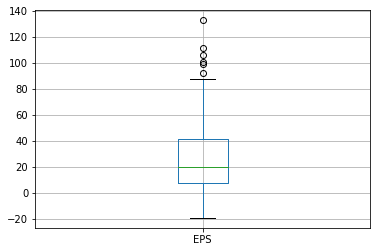

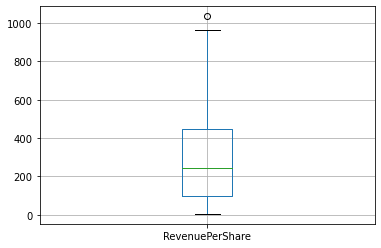

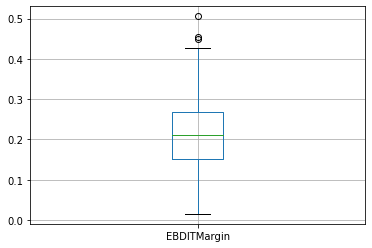

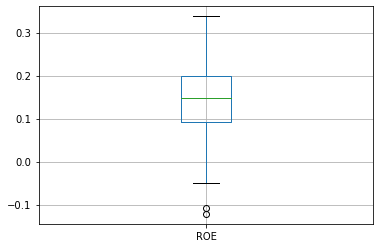

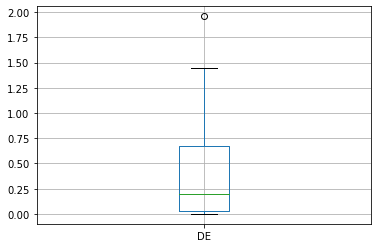

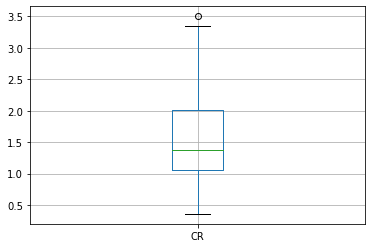

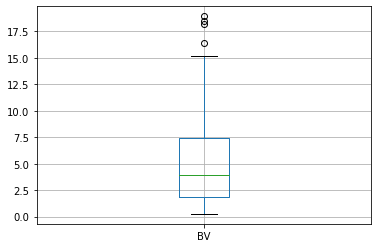

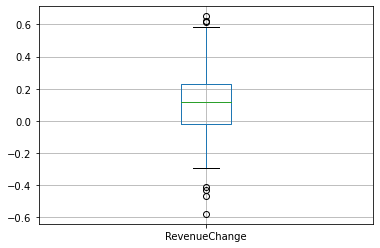

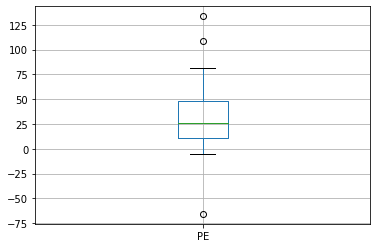

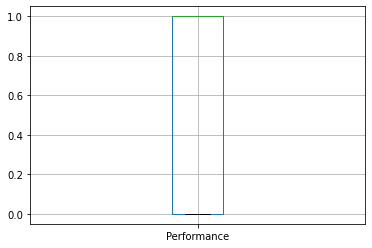

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE,Performance
EPS,1.000000,0.766085,0.100920,0.353669,-0.233782,0.202464,-0.148509,0.228387,-0.227530,0.269186
RevenuePerShare,0.766085,1.000000,-0.235431,-0.000794,0.134993,-0.018318,-0.264300,0.267749,-0.202751,0.216279
EBDITMargin,0.100920,-0.235431,1.000000,0.040034,-0.049341,0.084089,-0.232181,-0.054753,-0.189906,0.091262
ROE,0.353669,-0.000794,0.040034,1.000000,-0.412605,0.226645,0.394798,0.217012,-0.051948,0.160400
DE,-0.233782,0.134993,-0.049341,-0.412605,1.000000,-0.538701,-0.363514,0.010332,-0.108808,0.001174
CR,0.202464,-0.018318,0.084089,0.226645,-0.538701,1.000000,0.297780,0.015416,0.201346,0.032891
BV,-0.148509,-0.264300,-0.232181,0.394798,-0.363514,0.297780,1.000000,0.026121,0.608396,0.042520
RevenueChange,0.228387,0.267749,-0.054753,0.217012,0.010332,0.015416,0.026121,1.000000,0.027061,0.301955
PE,-0.227530,-0.202751,-0.189906,-0.051948,-0.108808,0.201346,0.608396,0.027061,1.000000,0.134232
Performance,0.269186,0.216279,0.091262,0.160400,0.001174,0.032891,0.042520,0.301955,0.134232,1.000000


In [165]:
# Cleaning test data
Column_Name = list(Test_data)
for i in Column_Name:
    Quantile_25 =np.quantile(Test_data[i],0.25)
    Quantile_75 =np.quantile(Test_data[i],0.75)
    IQR = Quantile_75-Quantile_25
    Lower = Quantile_25-(2*IQR)
    Upper = Quantile_75+(2*IQR)
    Test_data = Test_data[Test_data[i] > Lower]
    Test_data = Test_data[Test_data[i]<Upper]
    Test_data[[i]].boxplot()
    plt.show()
y_testdummy = list(Test_data["Performance"])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(Test_data))
Test_Data_Scaled = pd.DataFrame(scaler.fit_transform(Test_data[Column_Name[0:len(Column_Name)-1]]))
Test_Data_Scaled.columns = Column_Name[0:len(Column_Name)-1]

Test_Data_Scaled["Performance"] = y_testdummy
corr = Test_Data_Scaled.corr()
corr.style.background_gradient()

In [166]:
X_test = Test_Data_Scaled.drop(["Performance"],axis = 1)
y_test = Test_Data_Scaled["Performance"]

In [167]:
X_test.shape

(77, 9)

## Basic Knn model

https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

In [168]:
from sklearn import metrics

In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [170]:
#Creating the model
knn_cv = KNeighborsClassifier(n_neighbors=3)

In [171]:
cv_scores = cross_val_score(knn_cv, X_train,y_train,cv = 5,scoring="f1")

In [172]:
print(cv_scores)

[0.51612903 0.58461538 0.5625     0.58181818 0.6031746 ]


In [173]:
np.mean(cv_scores)

0.5696474403732469

## Hyper Parameter Tuning

In [174]:
#for varying the neighbours
k = np.arange(1,15)
knn_scores = []
for i in k:
    knn_cv = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(knn_cv, X_train,y_train,cv = 5,scoring="f1")
    knn_scores.append(np.mean(cv_scores))

In [175]:
knn_scores

[0.5756861912846633,
 0.4578944637969274,
 0.5696474403732469,
 0.5295038434661077,
 0.6161290322580645,
 0.5646901254279121,
 0.6089807852965747,
 0.5582155899744643,
 0.6280912929247144,
 0.5719607843137255,
 0.5932664414129931,
 0.5375428767998428,
 0.6022379664273435,
 0.5318804572664046]

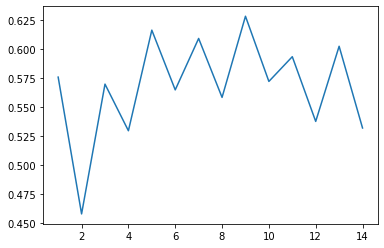

In [176]:
plt.plot(k,np.array(knn_scores))
plt.show()

It can be seen that at k = 5 , f1 score is maximum.

## Final Knn model

In [177]:
#Testing the final model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [178]:
predicted = knn.predict(X_test)

In [179]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.54      0.54      0.54        35
         1.0       0.62      0.62      0.62        42

    accuracy                           0.58        77
   macro avg       0.58      0.58      0.58        77
weighted avg       0.58      0.58      0.58        77



We got a test score of 62

# Basic logistic regression

(489, 10)
(123, 10)


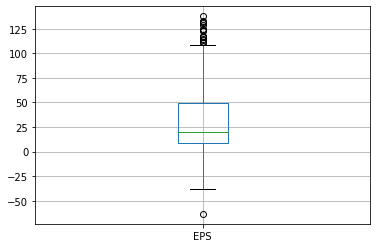

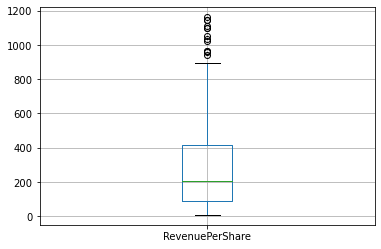

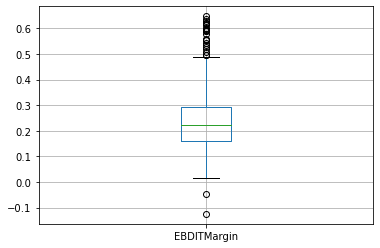

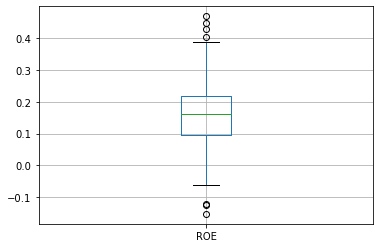

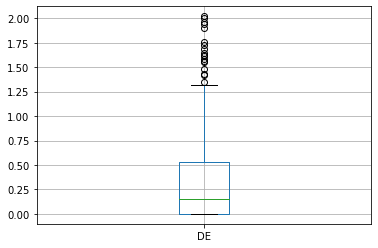

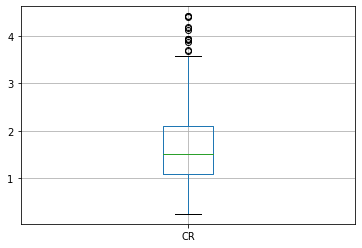

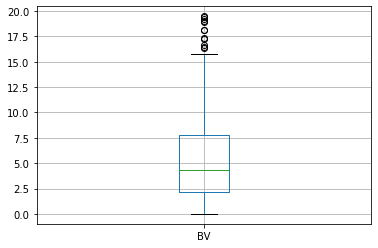

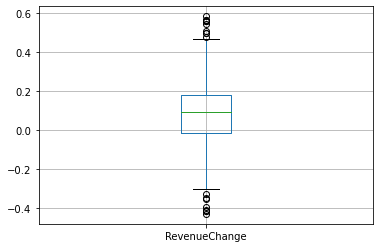

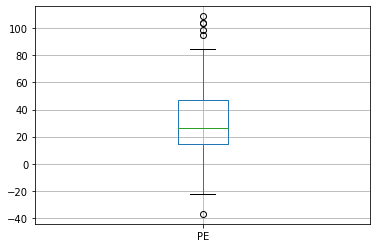

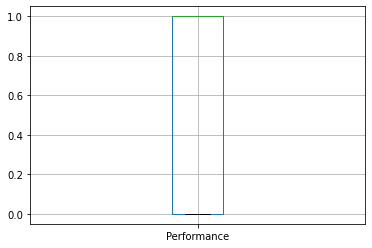

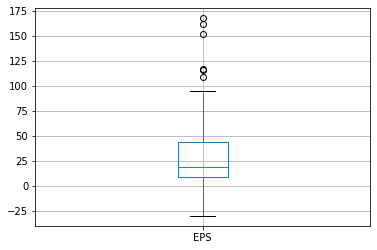

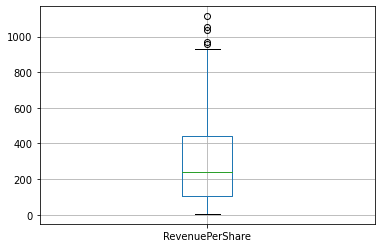

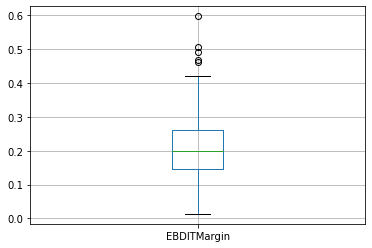

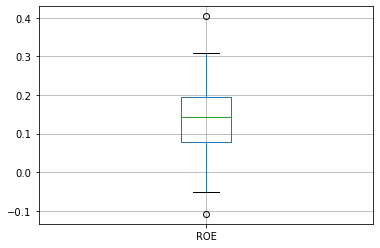

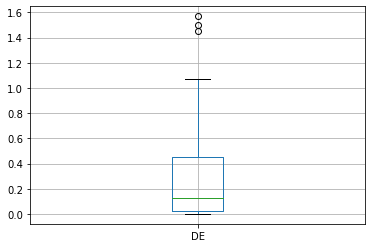

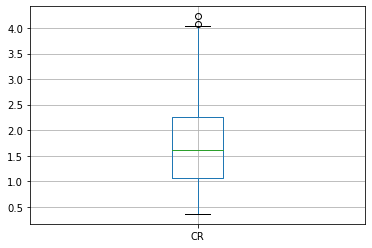

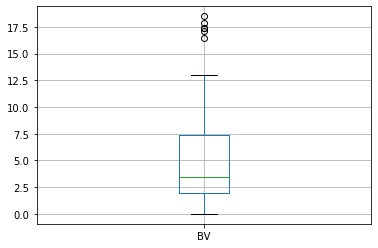

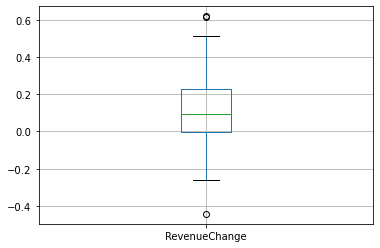

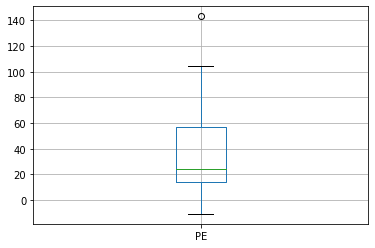

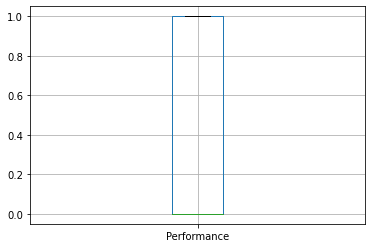

(75, 9)

In [217]:
#splitting data into train, validation and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
Train_data = pd.DataFrame(X_train)
Train_data["Performance"] = y_train
print(Train_data.shape)
Test_data = pd.DataFrame(X_test)
Test_data["Performance"] = y_test
print(Test_data.shape)
# Cleaning Train data
Column_Name = list(Train_data)
for i in Column_Name:
    Quantile_25 =np.quantile(Train_data[i],0.25)
    Quantile_75 =np.quantile(Train_data[i],0.75)
    IQR = Quantile_75-Quantile_25
    Lower = Quantile_25-(2*IQR)
    Upper = Quantile_75+(2*IQR)
    Train_data = Train_data[Train_data[i] > Lower]
    Train_data = Train_data[Train_data[i]<Upper]
    Train_data[[i]].boxplot()
    plt.show()
y_traindummy = list(Train_data["Performance"])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(Train_data))
Train_Data_Scaled = pd.DataFrame(scaler.fit_transform(Train_data[Column_Name[0:len(Column_Name)-1]]))
Train_Data_Scaled.columns = Column_Name[0:len(Column_Name)-1]
Train_Data_Scaled["Performance"] = y_traindummy
corr = Train_Data_Scaled.corr()
corr.style.background_gradient()

X_train = Train_Data_Scaled.drop(["Performance"],axis = 1)
y_train = Train_Data_Scaled["Performance"]

X_train.shape

# Cleaning test data
Column_Name = list(Test_data)
for i in Column_Name:
    Quantile_25 =np.quantile(Test_data[i],0.25)
    Quantile_75 =np.quantile(Test_data[i],0.75)
    IQR = Quantile_75-Quantile_25
    Lower = Quantile_25-(2*IQR)
    Upper = Quantile_75+(2*IQR)
    Test_data = Test_data[Test_data[i] > Lower]
    Test_data = Test_data[Test_data[i]<Upper]
    Test_data[[i]].boxplot()
    plt.show()
y_testdummy = list(Test_data["Performance"])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(Test_data))
Test_Data_Scaled = pd.DataFrame(scaler.fit_transform(Test_data[Column_Name[0:len(Column_Name)-1]]))
Test_Data_Scaled.columns = Column_Name[0:len(Column_Name)-1]

Test_Data_Scaled["Performance"] = y_testdummy
corr = Test_Data_Scaled.corr()
corr.style.background_gradient()

X_test = Test_Data_Scaled.drop(["Performance"],axis = 1)
y_test = Test_Data_Scaled["Performance"]

X_test.shape

In [181]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()


In [182]:
from sklearn.model_selection import cross_val_score

In [183]:
#Making the cross validation fit
cv_scores = cross_val_score(log_reg, X_train,y_train,cv = 5,scoring="f1")

In [184]:
print(cv_scores)

[0.67692308 0.59259259 0.56666667 0.5        0.70967742]


In [185]:
np.mean(cv_scores)

0.6091719511074349

The f1 score average is 61

Since , we saw there exist multicollinearity , we remove that my using forward selection of variables

## Forward Selection

In [191]:
#!pip install mlxtend

In [197]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [223]:
sfs1 = sfs(clas_tree, k_features = 7,forward = True,scoring = "f1")

In [224]:
sfs1 = sfs1.fit(X_train,y_train)

In [225]:
#The list of important columns
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['EPS', 'EBDITMargin', 'ROE', 'CR', 'BV', 'RevenueChange', 'PE']


In [226]:
X_train

,EPS,RevenuePerShare,EBDITMargin,ROE,DE,CR,BV,RevenueChange,PE
0,-0.231386,-0.294770,-0.416902,0.180139,-0.773502,1.341634,1.086744,0.106898,0.960211
1,-0.683579,-0.560660,-0.954333,0.152783,-0.751094,-0.304310,1.319910,0.770060,1.265215
2,-0.538281,-0.919691,0.907861,0.139652,-0.773502,-0.526103,0.021803,-1.783465,-0.049224
3,0.904297,0.714263,-0.446813,1.599360,-0.011628,-0.397696,2.050796,-0.239498,0.541675
4,-0.217515,-0.291992,-0.114899,-0.565035,0.414126,-1.284872,-0.700114,-0.263202,-0.570962
...,...,...,...,...,...,...,...,...,...
286,-0.535506,-0.219726,-0.194983,-0.343999,1.131184,-1.191485,0.133902,-1.127845,0.896451
287,0.106025,-0.446843,0.763131,0.676921,-0.773502,2.812477,2.819796,0.515785,1.906353
288,-0.673176,0.021163,-1.212918,-0.103268,-0.011628,-0.817937,-0.153071,0.293833,-0.093956
289,-1.015788,-1.050851,0.165878,-0.996163,0.414126,-1.179812,-0.785310,-0.558419,-0.339461


In [227]:
X_train = X_train[feat_names]

In [229]:
#Fitting the model with featured data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()


from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_reg, X_train,y_train,cv = 5,scoring="f1")

print(cv_scores)

[0.6557377  0.45614035 0.74626866 0.57971014 0.72131148]


In [230]:
np.mean(cv_scores)

0.6318336665698031

The cv score have been improved after removing the multicollinearity

## Final Testing

In [265]:
X_test = X_test[feat_names]

In [266]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [271]:
#Fitting the test data
model  = log_reg.fit(X_train,y_train)

In [274]:
predicted = model.predict(X_test)

In [275]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.64      0.53      0.58        40
         1.0       0.55      0.66      0.60        35

    accuracy                           0.59        75
   macro avg       0.59      0.59      0.59        75
weighted avg       0.59      0.59      0.59        75



Finally for test data too , f1- score is coming around 60

In [235]:
# from sklearn.tree import DecisionTreeClassifier
# clas_tree = DecisionTreeClassifier()
# clas_tree.fit(X_train,y_train)

In [234]:
# from sklearn import tree
# fig, axes = plt.subplots(figsize = (3,3),
#                          dpi = 300)
# tree.plot_tree(clas_tree,
#               feature_names = list(X),
#               filled = False)
# plt.show()

In [231]:
# # y_pred = clas_tree.predict(X_valid)
# y_pred

In [232]:
# from sklearn import metrics
# cm = metrics.confusion_matrix(y_valid, y_pred)
# print(cm)
# print(metrics.accuracy_score(y_valid, y_pred))
# print(metrics.precision_score(y_valid, y_pred))
# print(metrics.recall_score(y_valid, y_pred))
# print(metrics.f1_score(y_valid, y_pred))

In [233]:
# depth = np.arange(1,20)
# F1 = []
# for i in depth :
#     clas_tree = DecisionTreeClassifier(max_depth=i)
#     clas_tree.fit(X_train,y_train)
#     y_pred = clas_tree.predict(X_valid)
#     F1.append(metrics.f1_score(y_valid,y_pred))
# plt.plot(depth,np.array(F1))
# plt.show()

In [418]:
X_test = Test_Data_Scaled.drop(["Performance"],axis = 1)

In [419]:
y_test = Test_Data_Scaled["Performance"]

In [422]:
# Base Model

In [236]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()

# model.fit(X_train,y_train)

# prediction = model.predict(X_test)

# print(model.score(X_test,y_test))

# from sklearn import metrics

# cm = metrics.confusion_matrix(y_test, prediction)

# print(cm)

# print(cm)

# print(metrics.accuracy_score(y_test,prediction))

# print(metrics.precision_score(y_test,prediction))

# print(metrics.recall_score(y_test,prediction))

# print(metrics.f1_score(y_test,prediction))

In [237]:
# for i in range(1,15):
#     print(i)
#     from sklearn.linear_model import LogisticRegressionCV

#     model = LogisticRegressionCV(Cs = i)

#     model.fit(X_train,y_train)

#     prediction = model.predict(X_test)

#     print(model.score(X_test,y_test))

#     from sklearn import metrics

#     cm = metrics.confusion_matrix(y_test, prediction)

#     print(cm)

#     print(cm)

#     print(metrics.accuracy_score(y_test,prediction))

#     print(metrics.precision_score(y_test,prediction))

#     print(metrics.recall_score(y_test,prediction))

#     print(metrics.f1_score(y_test,prediction))

In [238]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Train_data = pd.DataFrame(X_train)

# Train_data["Performance"] = y_train

# Train_data

# Test_data = pd.DataFrame(X_test)

# X_test

# Test_data["Performance"] = y_test

# Test_data

In [239]:
# Column_Name = list(Test_data)
# for i in Column_Name:
#     Quantile_25 =np.quantile(Test_data[i],0.25)
#     Quantile_75 =np.quantile(Test_data[i],0.75)
#     IQR = Quantile_75-Quantile_25
#     Lower = Quantile_25-(2*IQR)
#     Upper = Quantile_75+(2*IQR)
#     Test_data = Test_data[Test_data[i] > Lower]
#     Test_data = Test_data[Test_data[i]<Upper]
#     Test_data[[i]].boxplot()
#     plt.show()
# y_testdummy = list(Test_data["Performance"])
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# pd.DataFrame(scaler.fit_transform(Test_data))
# Test_Data_Scaled = pd.DataFrame(scaler.fit_transform(Test_data[Column_Name[0:len(Column_Name)-1]]))
# Test_Data_Scaled.columns = Column_Name[0:len(Column_Name)-1]

# Test_Data_Scaled["Performance"] = y_testdummy
# corr = Test_Data_Scaled.corr()
# corr.style.background_gradient()

In [240]:
# X_test = Test_Data_Scaled.drop(["Performance"],axis = 1)

# y_test = Test_Data_Scaled["Performance"]

In [241]:
# Column_Name = list(Train_data)
# for i in Column_Name:
#     Quantile_25 =np.quantile(Train_data[i],0.25)
#     Quantile_75 =np.quantile(Train_data[i],0.75)
#     IQR = Quantile_75-Quantile_25
#     Lower = Quantile_25-(2*IQR)
#     Upper = Quantile_75+(2*IQR)
#     Train_data = Train_data[Train_data[i] > Lower]
#     Train_data = Train_data[Train_data[i]<Upper]
#     Train_data[[i]].boxplot()
#     plt.show()
# y_traindummy = list(Train_data["Performance"])
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# pd.DataFrame(scaler.fit_transform(Train_data))
# Train_Data_Scaled = pd.DataFrame(scaler.fit_transform(Train_data[Column_Name[0:len(Column_Name)-1]]))
# Train_Data_Scaled.columns = Column_Name[0:len(Column_Name)-1]

# Train_Data_Scaled["Performance"] = y_traindummy
# corr = Train_Data_Scaled.corr()
# corr.style.background_gradient()

In [242]:
# X_train = Train_Data_Scaled.drop(["Performance"],axis = 1)

# y_train = Train_Data_Scaled["Performance"]

In [243]:
# X_train

In [244]:
# Column_Name = list(Validation_data)
# for i in Column_Name:
#     Quantile_25 =np.quantile(Validation_data[i],0.25)
#     Quantile_75 =np.quantile(Validation_data[i],0.75)
#     IQR = Quantile_75-Quantile_25
#     Lower = Quantile_25-(2*IQR)
#     Upper = Quantile_75+(2*IQR)
#     Validation_data = Validation_data[Validation_data[i] > Lower]
#     Validation_data = Validation_data[Validation_data[i]<Upper]
#     Validation_data[[i]].boxplot()
#     plt.show()
# y_validdummy = list(Validation_data["Performance"])
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# pd.DataFrame(scaler.fit_transform(Validation_data))
# Validation_Data_Scaled = pd.DataFrame(scaler.fit_transform(Validation_data[Column_Name[0:len(Column_Name)-1]]))
# Validation_Data_Scaled.columns = Column_Name[0:len(Column_Name)-1]

# Validation_Data_Scaled["Performance"] = y_validdummy
# corr = Validation_Data_Scaled.corr()
# corr.style.background_gradient()

In [245]:
# X_valid = Validation_Data_Scaled.drop("Performance",axis = 1)

In [246]:
# y_valid = Validation_Data_Scaled["Performance"]

In [247]:
# for i in range(1,15):
#     print(i)
#     from sklearn.linear_model import LogisticRegressionCV

#     model = LogisticRegressionCV(Cs = i)

#     model.fit(X_train,y_train)

#     prediction = model.predict(X_test)

#     print(model.score(X_testa,y_test))

#     from sklearn import metrics

#     cm = metrics.confusion_matrix(y_test, prediction)

#     print(cm)

#     print(cm)

#     print(metrics.accuracy_score(y_test,prediction))

#     print(metrics.precision_score(y_test,prediction))

#     print(metrics.recall_score(y_test,prediction))

#     print(metrics.f1_score(y_test,prediction))

## Decision Tree

In [248]:
# from sklearn.tree import DecisionTreeClassifier

In [249]:
# clas_tree = DecisionTreeClassifier()


In [250]:
# clas_tree.fit(X_train,y_train)

In [251]:
# from sklearn import tree

In [252]:
# list(X)

In [253]:
# list()

In [254]:
# # fig, axes = plt.subplots(figsize = (3,3),
#                          dpi = 300)
# tree.plot_tree(clas_tree,
#               feature_names = list(X),
#               filled = False)
# plt.show()

In [255]:
# y_pred = clas_tree.predict(X_valid)
# y_pred

In [256]:
# from sklearn import metrics

In [257]:
# cm = metrics.confusion_matrix(y_valid, y_pred)

# print(cm)

# print(cm)

# print(metrics.accuracy_score(y_valid, y_pred))

# print(metrics.precision_score(y_valid, y_pred))

# print(metrics.recall_score(y_valid, y_pred))

# print(metrics.f1_score(y_valid, y_pred))

## Hyper Parameter Tuning

In [258]:
# depth = np.arange(1,10)
# F1 = []
# for i in depth :
#     clas_tree = DecisionTreeClassifier(max_depth=i)
#     clas_tree.fit(X_train,y_train)
#     y_pred = clas_tree.predict(X_valid)
#     F1.append(metrics.f1_score(y_valid,y_pred))

In [259]:
# # plt.plot(depth,np.array(F1))
# plt.show()

In [260]:
# clas_tree = DecisionTreeClassifier(max_depth=4)
# clas_tree.fit(X_train,y_train)
# y_pred = clas_tree.predict(X_valid)
# (metrics.f1_score(y_valid,y_pred))

## Final Testing

In [261]:
# clas_tree = DecisionTreeClassifier(max_depth=4)
# clas_tree.fit(X_train,y_train)

In [262]:
# fig,axes = plt.subplots(figsize =(3,3),
#                        dpi = 300)
# tree.plot_tree(clas_tree,
#               feature_names=list(X_train),
#               filled = False)
# plt.show()

In [263]:
# test_Predict = clas_tree.predict(X_test)

In [264]:
# metrics.f1_score(y_test,test_Predict)